In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re


sys.path.insert(0, 'C:/Users/ragna/Documents/Ragnar/Code/MMDGraph')
#from importlib import reload
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
#reload(readfoldertopanda)
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC

In [93]:
keys = ['nr_nodes_1', 'nr_nodes_2', 'loc_latent_1','loc_latent_2', 'n', 'm']
params_kernel = {}
data_auc = {}
data = {}

# Graph Hopper

In [108]:
data['GH'] = readfoldertopanda("../data/CliqueNormalLatent/GH")
data['GH'].columns
data['GH']['kernel_type'] = data['GH']['type'] +'_' + data['GH']['mu'].astype(str)

In [109]:
print(np.unique(data['GH']['nr_nodes_2']))
print(np.unique(data['GH']['n']))

[20 25 30 35]
[20 60]


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


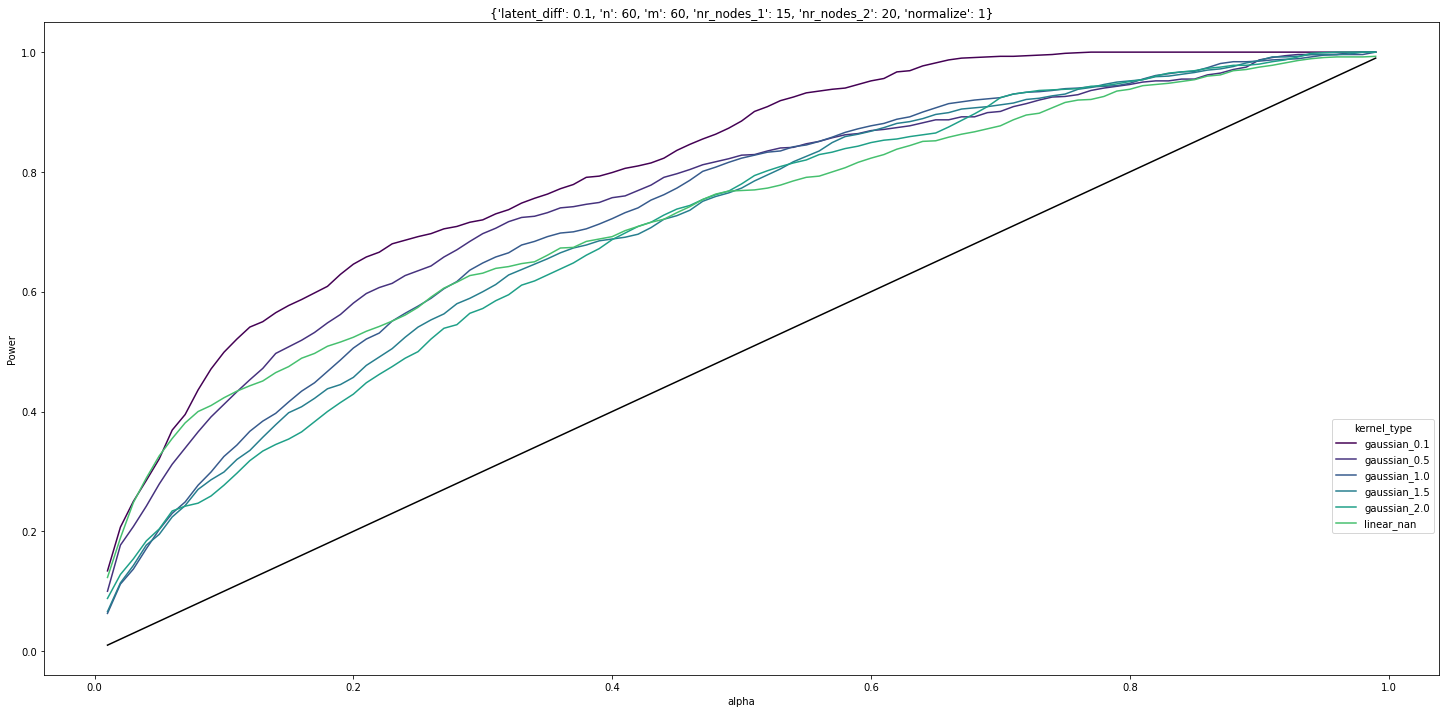

In [120]:
params_fixed = {'latent_diff':sorted(np.unique(data['GH']['latent_diff']))[0],
                'n':60,
                'm':60,
                'nr_nodes_1':15,
                'nr_nodes_2':20,
                'normalize':1
                }


plotVaryingBGDEG(df = data['GH'].copy(), param_vary_name = "kernel_type", params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")

In [111]:
params_kernel['GH'] = ['kernel_type', 'normalize']
data_auc['GH'] = findAUC(keys = keys, params = params_kernel['GH'], stats = ['MMD_b', 'MMD_u'], df = data['GH'] )

# Propagation

In [112]:
data['PROP'] = readfoldertopanda("../data/CliqueNormalLatent/PROP")
data['PROP'].columns


Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2',
       'loc_latent_1', 'loc_latent_2', 'latent_diff', 'n', 'm', 'timestap',
       'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'w', 'tmax', 'M'],
      dtype='object')

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


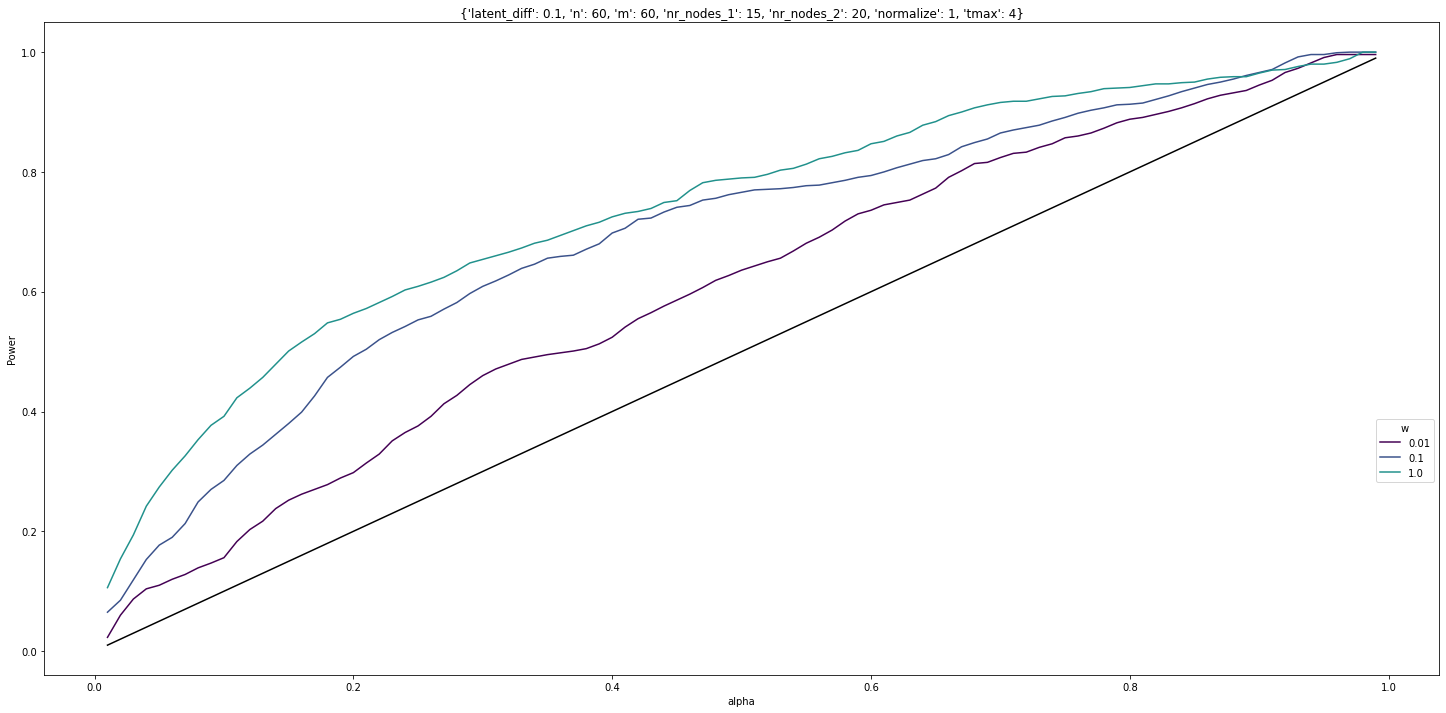

In [121]:
params_fixed = {'latent_diff':sorted(np.unique(data['PROP']['latent_diff']))[0],
                'n':60,
                'm':60,
                'nr_nodes_1':15,
                'nr_nodes_2':20,
                'normalize':1,
                'tmax':4,
                #'w':0.1
                }


plotVaryingBGDEG(df = data['PROP'].copy(), param_vary_name = "w", params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")

In [123]:
params_kernel['PROP'] = ['tmax','w', 'normalize']
data_auc['PROP'] = findAUC(keys = keys, params = params_kernel['PROP'], stats = ['MMD_b', 'MMD_u'], df = data['PROP'] )